In [41]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc




In [ ]:

# Load Dataset (2nd Sheet)
df = pd.read_excel("heart_disease.xlsx", sheet_name=1)
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (908, 13)


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:

#  Missing Values 
df.isnull().sum()


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [44]:
# oldpeak column impute with median
df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)

C:\Users\mohds\AppData\Local\Temp\ipykernel_6252\2935870978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].median(), inplace=True)


In [45]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

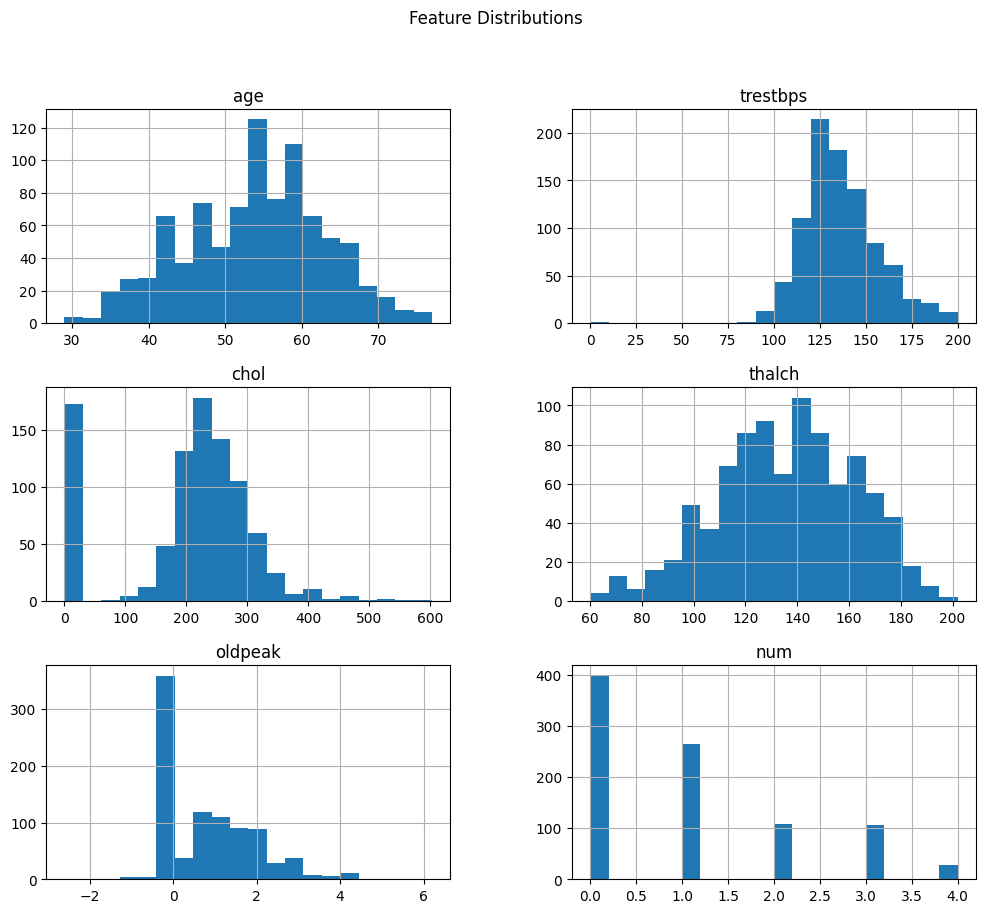

In [ ]:
# EDA)

# Histograms 
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


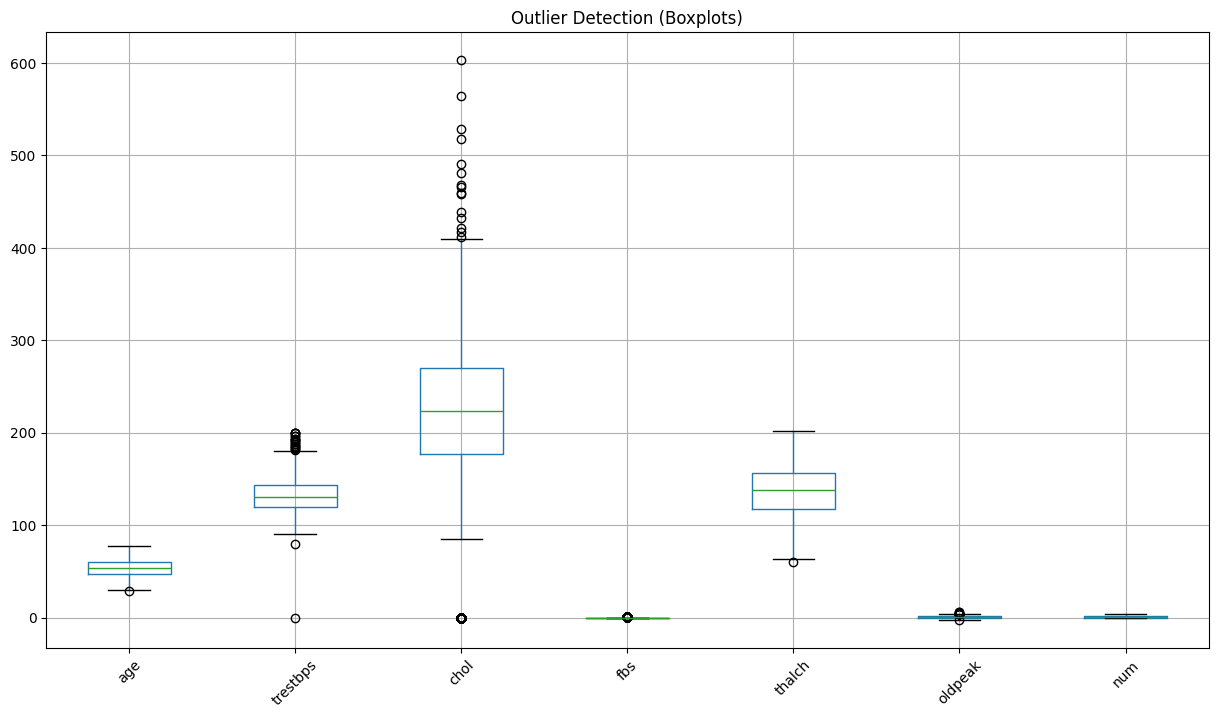

In [ ]:
# Boxplots 
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Outlier Detection (Boxplots)")
plt.show()

In [48]:
# Convert bool columns to int (True=1, False=0)
# Fix inconsistent True/False values
df = df.replace({
    "TRUE": 1, "True": 1, "true": 1, "TURE": 1,   # handle spelling mistake
    "FALSE": 0, "False": 0, "false": 0
})

# Convert real boolean to int also
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

df.head(10)


C:\Users\mohds\AppData\Local\Temp\ipykernel_6252\2491617624.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,1,lv hypertrophy,150,0,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,0,normal,132,0,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,0,normal,148,0,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,0,lv hypertrophy,190,0,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,0,normal,126,1,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,0,lv hypertrophy,138,0,2.3,upsloping,fixed defect,0
6,56,Male,non-anginal,130,276,0,normal,128,1,1.0,upsloping,fixed defect,0
7,48,Male,non-anginal,110,211,0,normal,138,0,0.0,downsloping,fixed defect,0
8,57,Male,atypical angina,140,260,1,normal,140,0,0.0,downsloping,fixed defect,0
9,53,Male,non-anginal,155,175,1,st-t abnormality,160,0,0.5,upsloping,fixed defect,0


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ["cp", "slope", "thal"]:
    df[col] = le.fit_transform(df[col])


In [50]:
# Encode Categorical Columns

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


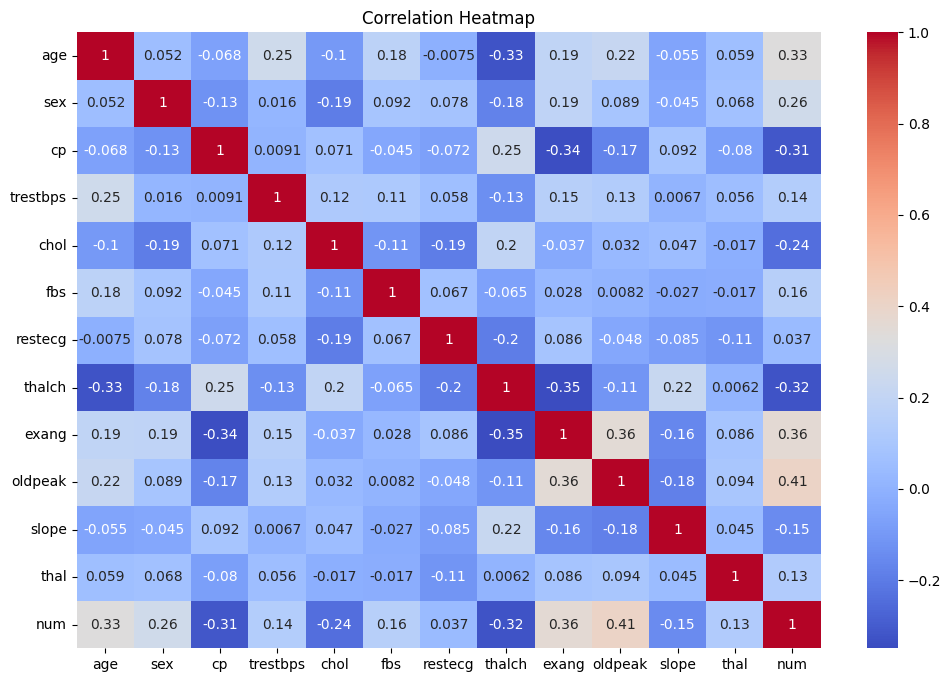

In [ ]:
#  heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:


df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

X = df.drop(["num", "target"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
#Train Decision Tree

model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4)
model.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [54]:
y_pred = model.predict(X_test)

In [55]:
# Evaluation

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Accuracy: 0.7967032967032966

Confusion Matrix:
 [[68 21]
 [16 77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79        89
           1       0.79      0.83      0.81        93

    accuracy                           0.80       182
   macro avg       0.80      0.80      0.80       182
weighted avg       0.80      0.80      0.80       182



In [56]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)



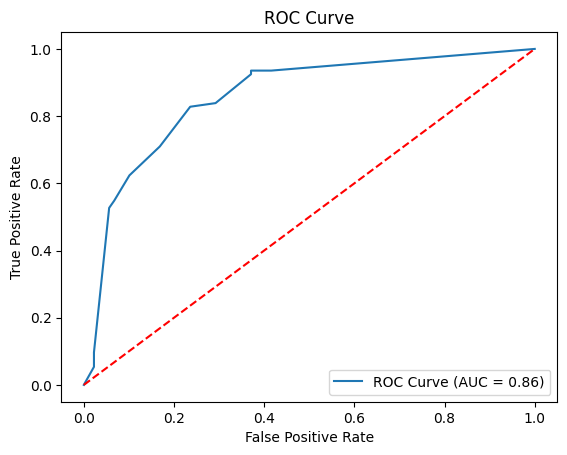

In [57]:
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#  Feature Importance

importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)




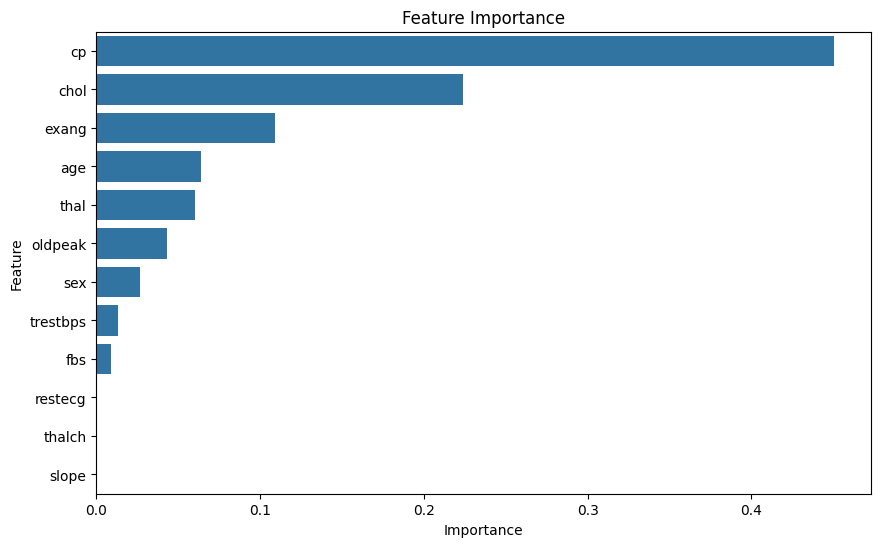

In [59]:
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()

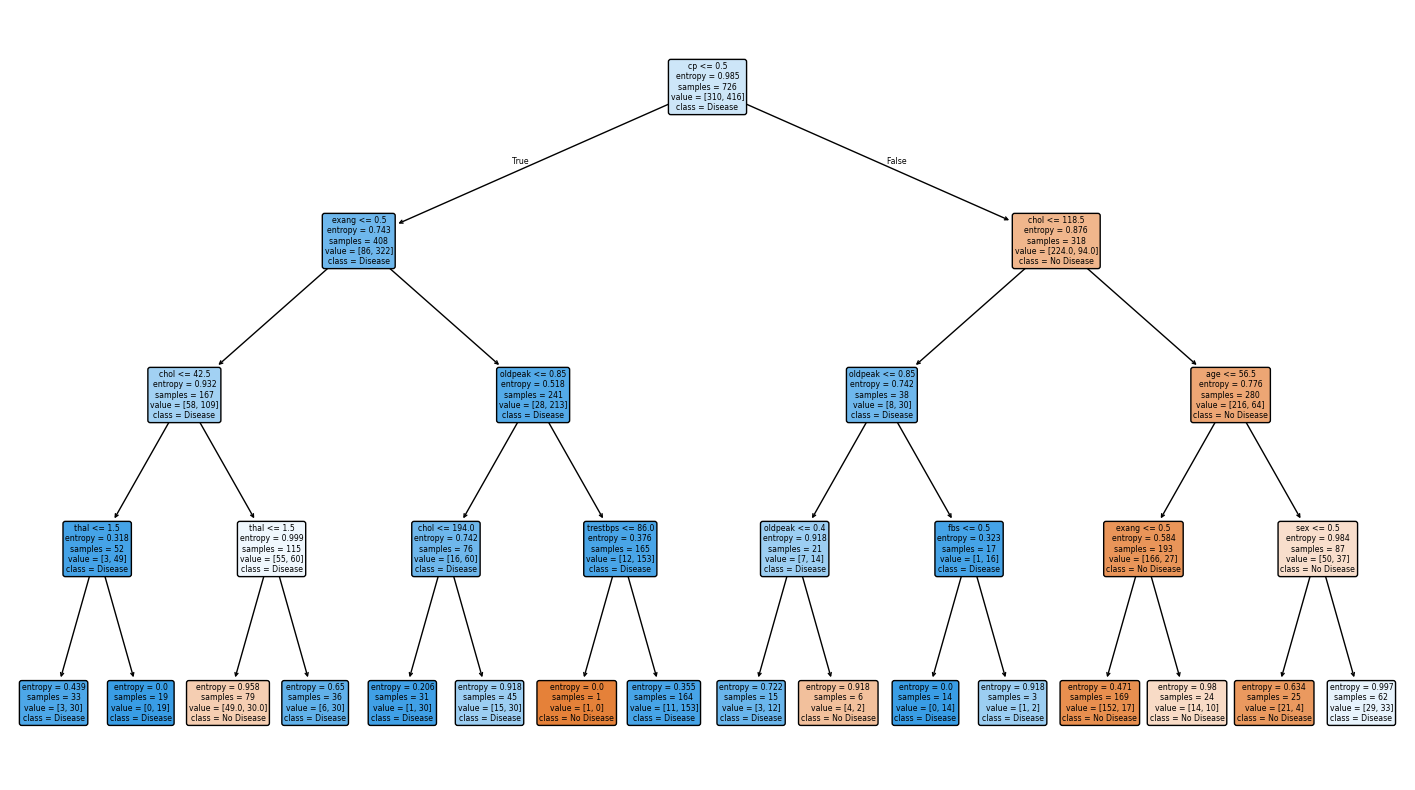

In [ ]:
# Decision Tree Visualization

plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, rounded=True)
plt.show()


### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1. **max_depth**  
   - Maximum depth of the tree.  
   - Small depth → underfitting, very simple model.  
   - Large depth → overfitting, too complex model.  

2. **min_samples_split**  
   - Minimum number of samples required to split a node.  
   - Higher value → less splits, simpler tree.  
   - Lower value → more splits, complex tree (risk of overfitting).  

3. **min_samples_leaf**  
   - Minimum number of samples required at a leaf node.  
   - Prevents very small leaves. Larger values smooth the model.  

4. **max_features**  
   - Number of features to consider when finding the best split.  
   - Reduces variance, increases generalization.  

5. **criterion** (e.g., "gini", "entropy")  
   - Metric used to measure the quality of a split.  
   - Different criteria may slightly change splits and accuracy.  

**Impact:**  
- Small values (low depth, high min_samples) → Underfitting.  
- Large values (high depth, low min_samples) → Overfitting.  
- Tuning these hyperparameters helps in finding the right bias-variance trade-off.  

---

### 2. What is the difference between Label Encoding and One-Hot Encoding?

**Label Encoding**  
- Converts each category into a numeric value (0, 1, 2, …).  
- Example: `['Red', 'Blue', 'Green'] → [0, 1, 2]`  
- **Pros:** Simple, memory-efficient.  
- **Cons:** Imposes ordinal relationship between categories (model may think 2 > 1 > 0).  
- Best for **ordinal data** (e.g., "Low", "Medium", "High").  

**One-Hot Encoding**  
- Creates new binary columns for each category.  
- Example: `['Red', 'Blue', 'Green'] → [[1,0,0], [0,1,0], [0,0,1]]`  
- **Pros:** No ordinal assumption. Suitable for nominal data.  
- **Cons:** Increases dimensionality if many categories.  
- Best for **nominal data** (e.g., "City names", "Product IDs").  

**Key Difference:**  
- Label Encoding → Single column, but may mislead model.  
- One-Hot Encoding → Multiple columns, no order issue, but higher dimensionality.  
